In [1]:
library(tidyverse)
library(caret)
library(rpart)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [2]:
titanic_train <- read_csv("./data/train.csv")
titanic_test <- read_csv("./data/test.csv")

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)
Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


In [3]:
str(titanic_train)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	891 obs. of  12 variables:
 $ PassengerId: num  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  NA "C85" NA "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),

In [4]:
str(titanic_test)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	418 obs. of  11 variables:
 $ PassengerId: num  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : num  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : num  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : num  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  NA NA NA NA ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Pclass = col_double(),
  ..   Name = col_character(),
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   SibSp = col_double(),
  ..   Parch = col_double(),
  ..   Ticket = col_character(),
  ..   Fare = co

### Check for any NAs

In [5]:
#which of the columns have NA
na_col_train <- apply(titanic_train, 2, function(x){
            any(is.na(x))
})
na_col_train

PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE        TRUE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE       FALSE        TRUE        TRUE

In [6]:
#indices of NA entities
na_matrix_train <- apply(titanic_train, 2, function(x){
            is.na(x)
})
na_tib_train <- na_matrix_train %>% as_tibble()
na_Age_ind_train <- which(na_tib_train$Age == TRUE)
na_Cabin_ind_train <- which(na_tib_train$Cabin == TRUE)
na_Embarked_ind_train <- which (na_tib_train$Embarked == TRUE)

In [7]:
length(na_Age_ind_train)

[1] 177

In [8]:
length(na_Cabin_ind_train)

[1] 687

In [9]:
length(na_Embarked_ind_train)

[1] 2

In [10]:
#which of the columns have NA
na_col_test <- apply(titanic_test, 2, function(x){
            any(is.na(x))
})
na_col_test

PassengerId      Pclass        Name         Sex         Age       SibSp 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE 
      Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE        TRUE        TRUE       FALSE

In [11]:
#indices of NA entities
na_matrix_test <- apply(titanic_test, 2, function(x){
            is.na(x)
})
na_tib_test <- na_matrix_test %>% as_tibble()
na_Age_ind_test <- which(na_tib_test$Age == TRUE)
na_Fare_ind_test <- which(na_tib_test$Fare == TRUE)
na_Cabin_ind_test <- which(na_tib_test$Cabin == TRUE)

In [12]:
length(na_Age_ind_test)

[1] 86

In [13]:
length(na_Fare_ind_test)

[1] 1

In [14]:
length(na_Cabin_ind_test)

[1] 327

### Handle missing values

In [15]:
titanic_train$Age[na_Age_ind_train] <- titanic_train %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [16]:
sum(is.na(titanic_train$Age))

[1] 0

In [17]:
titanic_train %>% .$Embarked %>% as_factor() %>% summary()

S    C    Q NA's 
 644  168   77    2

In [18]:
titanic_train$Embarked[na_Embarked_ind_train] <- "S" 

In [19]:
titanic_test$Age[na_Age_ind_test] <- titanic_test %>% filter(!is.na(Age)) %>%
    pull(Age) %>% median()

In [20]:
titanic_test$Fare[na_Fare_ind_test] <- titanic_test %>% filter(!is.na(Fare)) %>%
    pull(Fare) %>% median()

### Check how many percentages of females and males survived

In [21]:
titanic_train %>% group_by(Sex) %>% summarize(mean(Survived))

Sex,mean(Survived)
female,0.7420382
male,0.1889081


### Gender model

In [22]:
y_hat_gender <- ifelse(titanic_test$Sex == "female", 1, 0)
pred_gender <- tibble(PassengerId = titanic_test$PassengerId,
                     Survived = y_hat_gender)
write_csv(pred_gender, "./csv_files/pred_gender.csv")

Gender model would score 0.76555

### Factorize train and test sets

In [23]:
titanic_train_factorized <- titanic_train %>% mutate(Survived = factor(Survived),
                                               Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Survived, Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

In [24]:
titanic_test_factorized <- titanic_test %>% mutate(Pclass = factor(Pclass),
                                               Sex = factor(Sex),
                                               Embarked = factor(Embarked)) %>%
                            select(Sex, Pclass, Age, SibSp, Parch, Fare, Embarked)

### Feature engineering and transformation

In [25]:
# adding a new feature that is family size
titanic_train_factorized <- titanic_train_factorized %>% mutate(FamilySize = SibSp + Parch)
titanic_test_factorized <- titanic_test_factorized %>% mutate(FamilySize = SibSp + Parch)

#### Including passengers' titles could be useful

In [26]:
# Using regex to extract passengers' titles
pattern <- "^.+,\\s?(\\w+\\s?\\w*\\.)"
titles <- str_match(titanic_train$Name, pattern)[,2]
levels(factor(titles))

[1] "Capt."         "Col."          "Don."          "Dr."          
 [5] "Jonkheer."     "Lady."         "Major."        "Master."      
 [9] "Miss."         "Mlle."         "Mme."          "Mr."          
[13] "Mrs."          "Ms."           "Rev."          "Sir."         
[17] "the Countess."

In [27]:
titanic_train_factorized <- titanic_train_factorized %>% mutate(Title = titles)

In [28]:
# Similarly for the test set
titles <- str_match(titanic_test$Name, pattern)[,2]
levels(factor(titles))
titanic_test_factorized <- titanic_test_factorized %>% mutate(Title = titles)

[1] "Col."    "Dona."   "Dr."     "Master." "Miss."   "Mr."     "Mrs."   
[8] "Ms."     "Rev."

In [29]:
# Check that all titles in the test set are also in the train set
all(titanic_test_factorized$Title %in% titanic_train_factorized$Title)

[1] FALSE

In [30]:
# Check title not in train set
titanic_test_factorized$Title[!(titanic_test_factorized$Title %in% titanic_train_factorized$Title)]

[1] "Dona."

In [31]:
# Check full name of one "Dona."
titanic_test$Name[str_detect(titanic_test$Name, "Dona\\.")]

[1] "Oliva y Ocana, Dona. Fermina"

In [32]:
# Since it was only one passenger, we may be able to assume that "Dona." is similar or related to "Don."
titanic_test_factorized$Title[str_detect(titanic_test_factorized$Title, "Dona\\.")] <- "Don."
# Re-check all titles in the test set are also in the train set
all(titanic_test_factorized$Title %in% titanic_train_factorized$Title)

[1] TRUE

In [33]:
titanic_train_factorized <- titanic_train_factorized %>% mutate(Title = factor(Title))
titanic_test_factorized <- titanic_test_factorized %>% mutate(Title = factor(Title))

In [34]:
titanic_train_factorized %>% group_by(Title) %>% summarize(n = n())

Title,n
Capt.,1
Col.,2
Don.,1
Dr.,7
Jonkheer.,1
Lady.,1
Major.,2
Master.,40
Miss.,182
Mlle.,2


In [35]:
titanic_test_factorized %>% group_by(Title) %>% summarize(n = n())

Title,n
Col.,2
Don.,1
Dr.,1
Master.,21
Miss.,78
Mr.,240
Mrs.,72
Ms.,1
Rev.,2


### Neural Networks with nnet (single hidden layer)

In [ ]:
fit_nnet <- train(Survived ~ Sex + Fare + Pclass + Age + FamilySize + SibSp + Parch, method = "nnet", data = titanic_train_factorized,
                  preProcess = "range",
                  tuneGrid = expand.grid(size = seq(from = 1, to = 10, by = 1),
                        decay = seq(from = 0.1, to = 0.7, by = 0.1)),
                  trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [37]:
fit_nnet

Neural Network 

891 samples
  7 predictor
  2 classes: '0', '1' 

Pre-processing: re-scaling to [0, 1] (8) 
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 780, 780, 780, 779, 779, 780, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
   1    0.1    0.8024459  0.5654089
   1    0.2    0.8010924  0.5625806
   1    0.3    0.8024519  0.5652458
   1    0.4    0.8031175  0.5666984
   1    0.5    0.8044527  0.5698663
   1    0.6    0.8066970  0.5746062
   1    0.7    0.8069120  0.5755867
   2    0.1    0.8015592  0.5640074
   2    0.2    0.8017743  0.5650038
   2    0.3    0.8044588  0.5707855
   2    0.4    0.8062505  0.5745835
   2    0.5    0.8051223  0.5725622
   2    0.6    0.8053456  0.5732071
   2    0.7    0.8062424  0.5752225
   3    0.1    0.8114330  0.5864732
   3    0.2    0.8024460  0.5662386
   3    0.3    0.8035680  0.5685486
   3    0.4    0.8055829  0.5734736
   3    0.5    0.8046699  0.5717385
   3    0

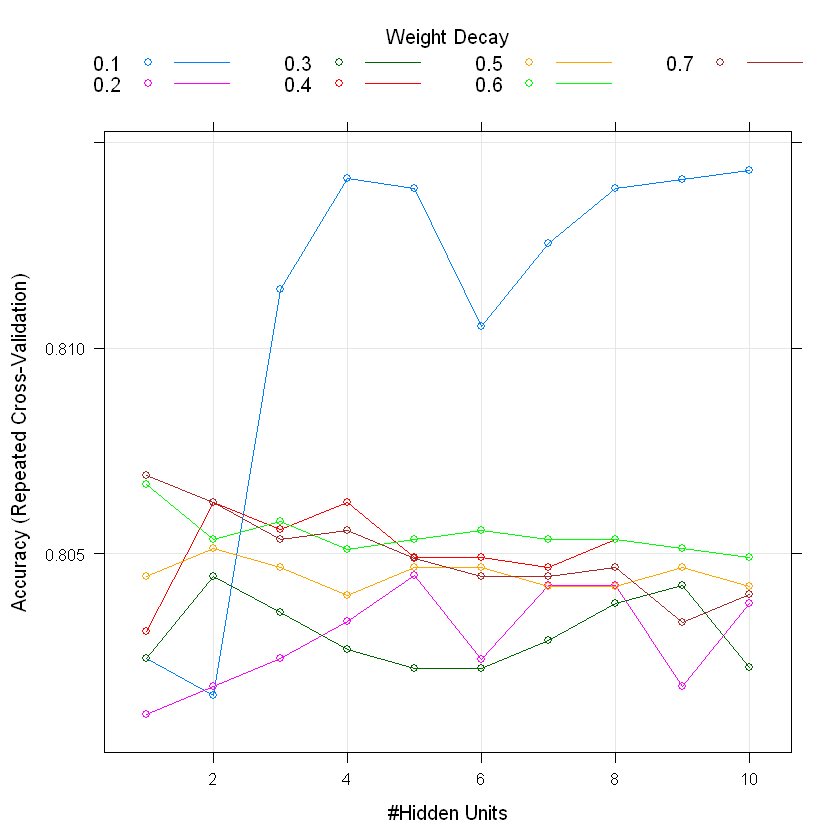

In [38]:
plot(fit_nnet)

In [39]:
y_hat_nnet <- predict(fit_nnet, titanic_test_factorized)
pred_nnet <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_nnet))
write_csv(pred_nnet, "./csv_files/pred_nnet.csv")

nnet scored 0.76076

### knn

In [40]:
fit_knn <- train(Survived ~ Sex + Pclass + Fare + Age + FamilySize, method = "knn", data = titanic_train_factorized,
                 preProcess= "range",
                 tuneGrid = data.frame(k = seq(3, 33, 2)),
                 trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [41]:
fit_knn

k-Nearest Neighbors 

891 samples
  5 predictor
  2 classes: '0', '1' 

Pre-processing: re-scaling to [0, 1] (6) 
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 781, 779, 780, 780, 779, 779, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.8067781  0.5885102
   5  0.8128149  0.5992587
   7  0.8125858  0.5980079
   9  0.8132635  0.5970404
  11  0.8060824  0.5793090
  13  0.8067219  0.5800222
  15  0.8033594  0.5699162
  17  0.8060603  0.5749416
  19  0.8006609  0.5621436
  21  0.8031505  0.5675707
  23  0.8044998  0.5708364
  25  0.8071864  0.5774813
  27  0.8044997  0.5717011
  29  0.8067419  0.5764081
  31  0.8053926  0.5736571
  33  0.8031565  0.5684123

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

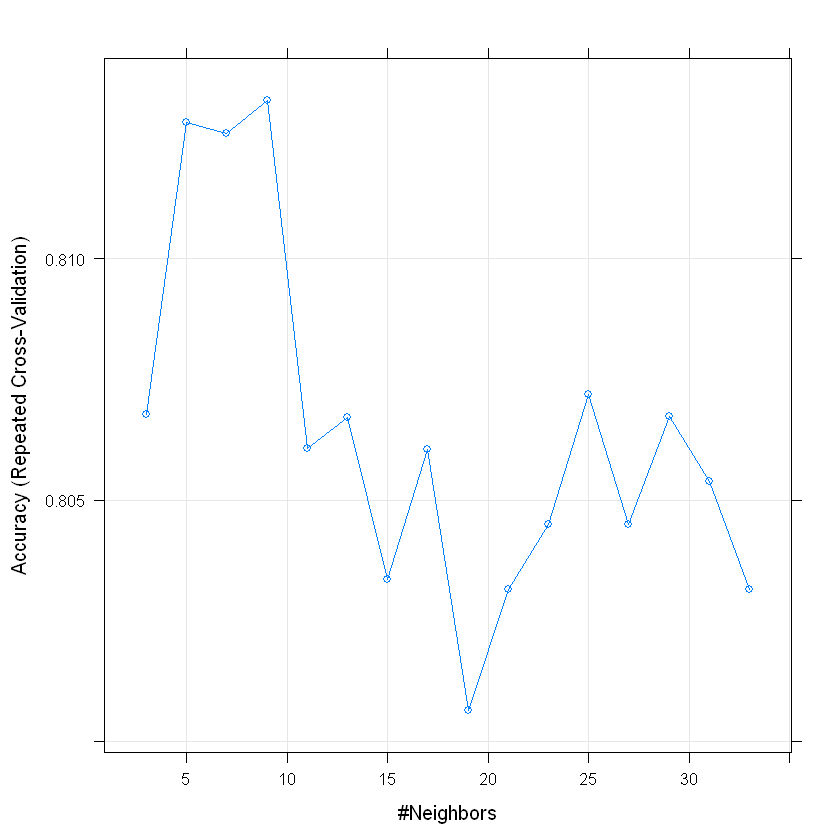

In [42]:
plot(fit_knn)

In [43]:
y_hat_knn <- predict(fit_knn, titanic_test_factorized)
pred_knn <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_knn))
write_csv(pred_knn, "./csv_files/pred_knn.csv")

### Logistic regression with glm

In [44]:
fit_logit <- train(Survived ~ Sex + Fare + Pclass + FamilySize + Age, method = "glm", 
                data = titanic_train_factorized, family = "binomial",
                trControl = trainControl(method="repeatedcv", number=8, repeats=5))

In [45]:
fit_logit

Generalized Linear Model 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 779, 779, 779, 779, 780, 779, ... 
Resampling results:

  Accuracy   Kappa    
  0.7957405  0.5630312


In [46]:
y_hat_logit <- predict(fit_logit, titanic_test_factorized)
pred_logit <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_logit))
write_csv(pred_logit, "./csv_files/pred_logit.csv")

logit submission scored 0.75598

### Decision Tree with rpart

In [47]:
fit_rpart <- train(Survived ~ ., method = "rpart", tuneGrid = data.frame(cp = seq(0, 0.02, 0.001)),
                data = titanic_train_factorized,
                trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [48]:
fit_rpart$bestTune

,cp
6,0.005


In [49]:
fit_rpart

CART 

891 samples
  9 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 779, 781, 779, 780, 781, 779, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.000  0.8150333  0.6018038
  0.001  0.8150333  0.6018038
  0.002  0.8143515  0.5999390
  0.003  0.8154737  0.6011964
  0.004  0.8190794  0.6076567
  0.005  0.8201995  0.6099510
  0.006  0.8186370  0.6066409
  0.007  0.8168291  0.6031072
  0.008  0.8168331  0.6036603
  0.009  0.8139233  0.5971481
  0.010  0.8139193  0.5974108
  0.011  0.8130245  0.5956799
  0.012  0.8143657  0.5995276
  0.013  0.8143657  0.5995276
  0.014  0.8143758  0.6017751
  0.015  0.8143758  0.6017751
  0.016  0.8145991  0.6033066
  0.017  0.8141527  0.6022383
  0.018  0.8141527  0.6022383
  0.019  0.8143759  0.6027737
  0.020  0.8146011  0.6032954

Accuracy was used to select the optimal model using the largest value.
The final value used for the mo

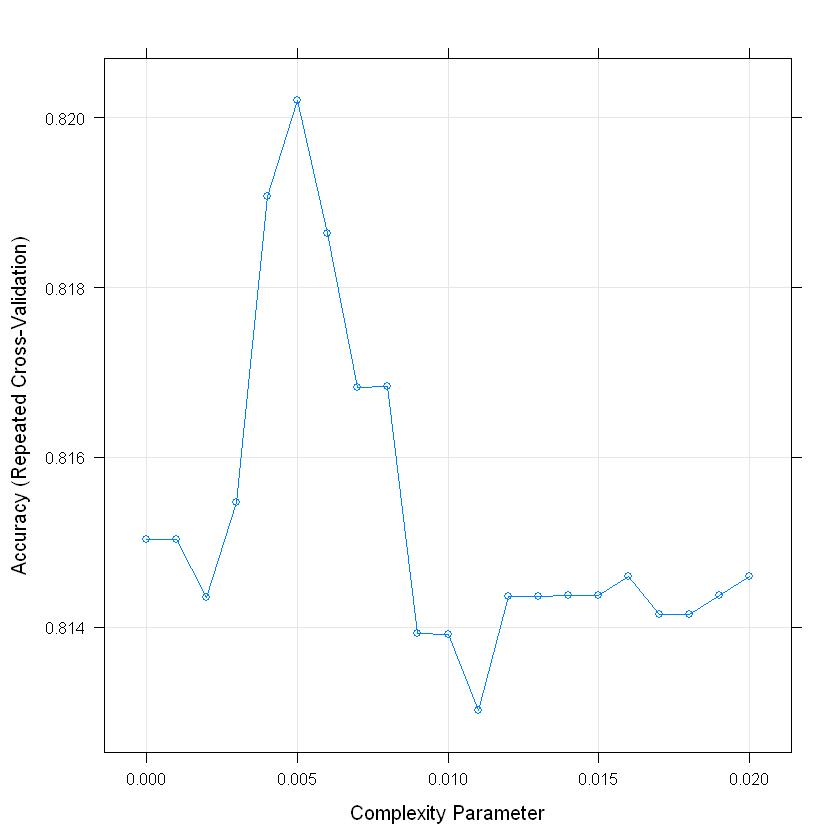

In [50]:
plot(fit_rpart)

In [51]:
y_hat_rpart <- predict(fit_rpart, titanic_test_factorized)
pred_rpart <- tibble(PassengerId = titanic_test$PassengerId,
                    Survived = as.character(y_hat_rpart))
write_csv(pred_rpart, "./csv_files/pred_rpart.csv")

In [52]:
varImp(fit_rpart)

rpart variable importance

  only 20 most important variables shown (out of 26)

               Overall
Sexmale        100.000
TitleMr.        93.303
Pclass3         66.565
Fare            39.593
TitleMrs.       36.335
TitleMiss.      33.873
FamilySize      24.201
SibSp           20.089
Age             13.261
TitleMaster.     6.814
Pclass2          6.442
EmbarkedS        2.900
EmbarkedQ        1.248
TitleMajor.      0.000
TitleJonkheer.   0.000
TitleMme.        0.000
TitleLady.       0.000
TitleDon.        0.000
TitleSir.        0.000
Parch            0.000

In [53]:
nrow(pred_rpart)

[1] 418

rpart submission scored 0.77511

### Random Forest

In [54]:
fit_rf <- train(Survived ~ ., method = "rf", data = titanic_train_factorized,
               ntree = 1000, tuneGrid = data.frame(mtry = seq(2, 5, 1)),
               trControl = trainControl(method="repeatedcv", number=8, repeats = 5))
fit_rf$bestTune

,mtry
2,3


In [55]:
fit_rf

Random Forest 

891 samples
  9 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 781, 779, 780, 779, 779, 780, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8217297  0.6147389
  3     0.8286856  0.6312881
  4     0.8275696  0.6267304
  5     0.8277969  0.6250803

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

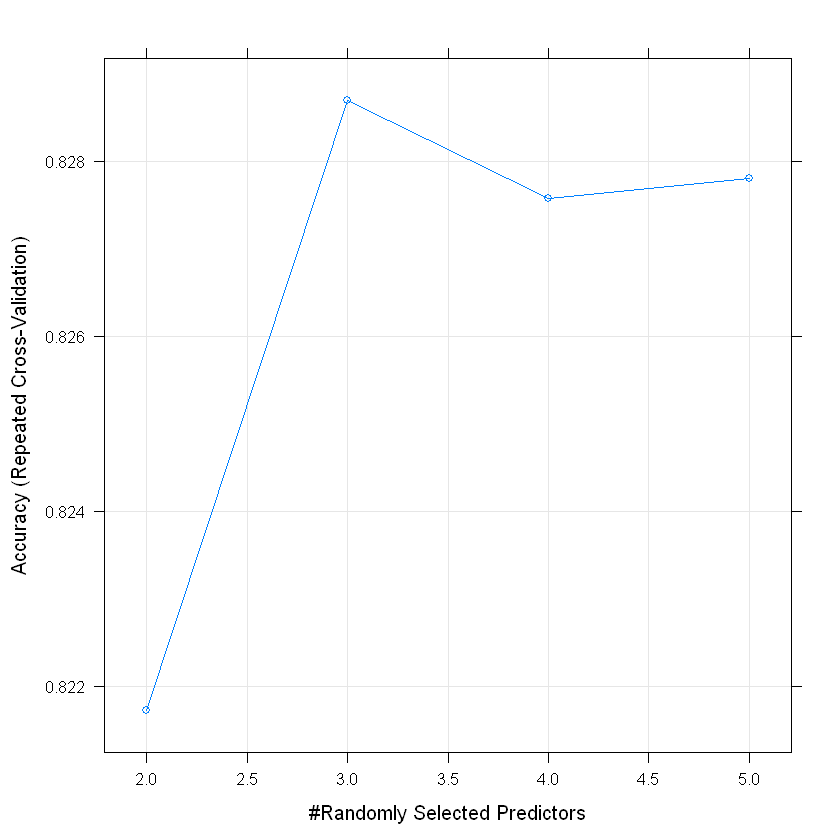

In [56]:
plot(fit_rf)

In [57]:
y_hat_rf <- predict(fit_rf, titanic_test_factorized)
pred_rf <- tibble(PassengerId = titanic_test$PassengerId,
                 Survived = as.character(y_hat_rf))
write_csv(pred_rf, "./csv_files/pred_rf.csv")

In [58]:
varImp(fit_rf)

rf variable importance

  only 20 most important variables shown (out of 26)

              Overall
Sexmale      100.0000
TitleMr.      97.9322
Fare          55.1372
Pclass3       35.4334
TitleMiss.    32.1496
TitleMrs.     31.8277
Age           28.8433
FamilySize    24.5496
SibSp         17.3673
Parch         10.3100
EmbarkedS      8.2209
Pclass2        7.9589
TitleMaster.   6.2020
EmbarkedQ      3.6370
TitleRev.      2.6566
TitleDr.       1.2658
TitleCol.      0.6220
TitleMajor.    0.3603
TitleMlle.     0.3573
TitleDon.      0.2717

rf submission scored 0.78468

### SVM with linear kernel

In [74]:
fit_svm <- train(Survived ~ Sex + Fare + Pclass + Age + SibSp + Parch, method = "svmLinear", data = titanic_train_factorized,
                 preProcess = "range",
                 tuneGrid = expand.grid(C = seq(0.01, 2, length = 10)),
                 trControl = trainControl(method="repeatedcv", number=8, repeats = 5))

In [75]:
fit_svm

Support Vector Machines with Linear Kernel 

891 samples
  6 predictor
  2 classes: '0', '1' 

Pre-processing: re-scaling to [0, 1] (7) 
Resampling: Cross-Validated (8 fold, repeated 5 times) 
Summary of sample sizes: 780, 779, 779, 779, 780, 781, ... 
Resampling results across tuning parameters:

  C          Accuracy   Kappa    
  0.0100000  0.7867939  0.5421770
  0.2311111  0.7867939  0.5420722
  0.4522222  0.7867939  0.5420722
  0.6733333  0.7867939  0.5420722
  0.8944444  0.7861242  0.5406637
  1.1155556  0.7861242  0.5406637
  1.3366667  0.7861242  0.5406637
  1.5577778  0.7861242  0.5406637
  1.7788889  0.7861242  0.5406637
  2.0000000  0.7861242  0.5406637

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.01.

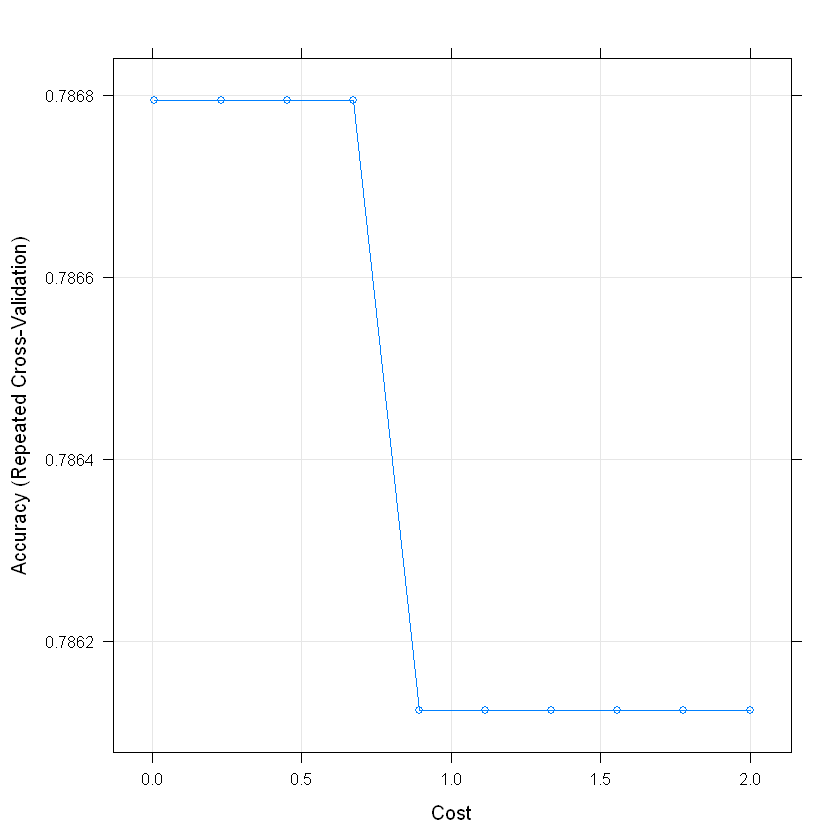

In [76]:
plot(fit_svm)

In [77]:
y_hat_svm <- predict(fit_svm, titanic_test_factorized)
pred_svm <- tibble(PassengerID = titanic_test$PassengerId,
                  Survived = as.character(y_hat_svm))
write_csv(pred_svm, "./csv_files/pred_svm.csv")

In [78]:
str(y_hat_svm)

 Factor w/ 2 levels "0","1": 1 2 1 1 2 1 2 1 2 1 ...


In [79]:
str(pred_svm$Survived)

 chr [1:418] "0" "1" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" ...


SVM scored 0.76555



### Ensembles with select models


Call:
summary.resamples(object = results)

Models: rf, nnet, rpart, knn, svm, logit 
Number of resamples: 40 

Accuracy 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf    0.7747748 0.8090909 0.8243506 0.8286856 0.8482143 0.9285714    0
nnet  0.7567568 0.7927928 0.8125000 0.8143308 0.8381998 0.8928571    0
rpart 0.7589286 0.8018018 0.8214286 0.8201995 0.8389844 0.8839286    0
knn   0.7589286 0.7941803 0.8071911 0.8132635 0.8341315 0.8648649    0
svm   0.7053571 0.7673343 0.7883117 0.7867939 0.8125000 0.8660714    0
logit 0.7321429 0.7747748 0.7982223 0.7957405 0.8143300 0.8482143    0

Kappa 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf    0.5189808 0.5928016 0.6191772 0.6312881 0.6726786 0.8449290    0
nnet  0.4754219 0.5414860 0.5925251 0.5943922 0.6455018 0.7652812    0
rpart 0.4836066 0.5686962 0.6153216 0.6099510 0.6494702 0.7445614    0
knn   0.4881517 0.5565287 0.5860671 0.5970404 0.6487060 0.7090687    0
svm   0.3631978 0.

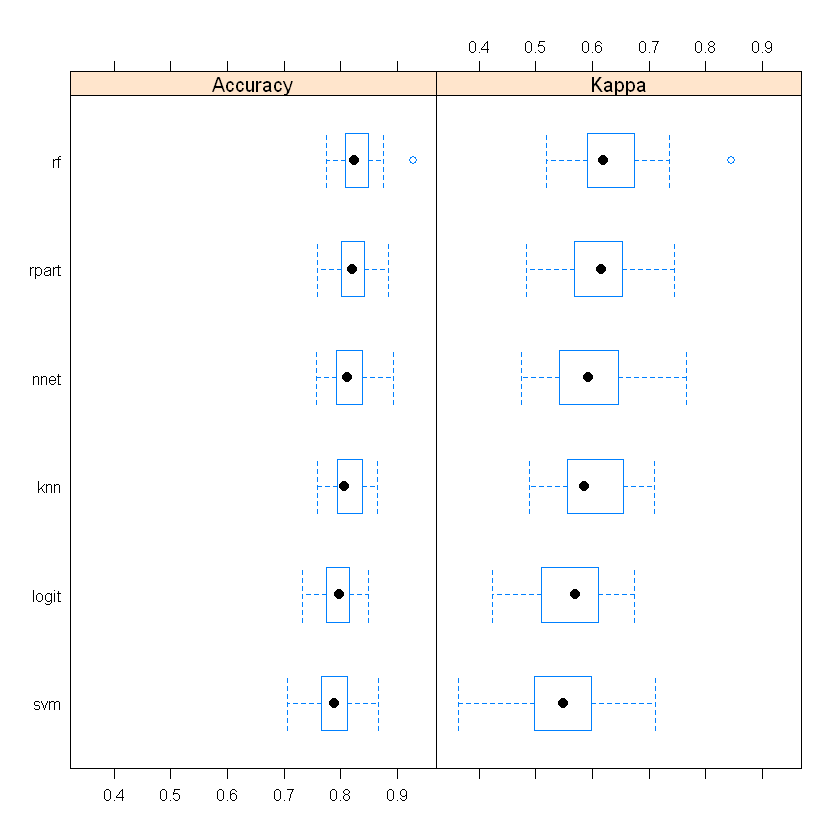

In [80]:
# Compare model results
results <- resamples(list(rf=fit_rf, nnet=fit_nnet, rpart=fit_rpart, knn=fit_knn, svm=fit_svm, logit=fit_logit))
summary(results)
bwplot(results)

In [81]:
models <- c("pred_rf", "pred_nnet", "pred_rpart", "pred_knn", "pred_logit")
# excluding worst-performing svm model and gender model

In [82]:
length(pred_rf$Survived)

[1] 418

In [83]:
preds <- sapply(models, function(model){
    x = paste0(model, "$Survived")
    eval(parse(text = x))
})

In [84]:
dim(preds)

[1] 418   5

In [85]:
head(preds, 20)

pred_rf,pred_nnet,pred_rpart,pred_knn,pred_logit
0,0,0,0,0
1,0,0,0,0
0,0,0,0,0
0,0,0,0,0
1,0,1,1,1
0,0,0,0,0
1,1,1,1,1
0,0,0,0,0
1,1,1,1,1
0,0,0,0,0


In [86]:
votes <- rowMeans(preds == "1")
y_hat_ensembles <- ifelse(votes > 0.5, "1", "0")

In [87]:
str(y_hat_ensembles)

 chr [1:418] "0" "0" "0" "0" "1" "0" "1" "0" "1" "0" "0" "0" "1" "0" "1" ...


In [88]:
pred_ensembles <- tibble(PassengerID = titanic_test$PassengerId,
                  Survived = y_hat_ensembles)
write_csv(pred_ensembles, "./csv_files/pred_ensembles.csv")

ensembles scored 0.78947